In [20]:
#pandas for data manipulation
#os for reading available files in a folder
#numpy for computaion
#sklearn- traintest split for splitting the data
import pandas as pd
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
#os.listdir lists all files in the given directry
files=os.listdir("Artifacts tagged")

dfs=data frames of all files with 1st second trimmed as it containd random values 


In [57]:
#dfs=data frames of all files with 1st second trimmed as it containd random values 
dfs = [pd.read_csv('Artifacts tagged/'+fp,names=['amplitude','value'])[250:] for fp in files]
#concat funtion joins all files in dfs and make a large df(data frame)
df = pd.concat(dfs)
#reset_index resets the index from 1 2 3....7 8 1 2 3     to         1 2 3 ... 7 8 9 10 11, 
df=df.reset_index(drop=True)

# arr is a 2d array like [[(amplitude values)321,32,4,43],(label)45] containing labeled data

In [22]:
#arr initialized
arr=[]
#loop
while(True):
    #find first index with non 0 value
    start=df.value.ne(0).idxmax()
    #end condition when all are zero
    if(start==0):
        break
    # create a temp variable to store df excluding starting zeros
    temp=df.iloc[start:]
    #from temp finding first zero index
    end=temp[temp.value==0].first_valid_index()-1
    #a contains the latest chunk of labled data
    a=df.iloc[start:end]
    a=a.reset_index(drop=True)
    #appending a to arr
    arr.append([a.amplitude.tolist(),a.value[0]])
    #truncate the original df to first found chunk
    df=df.iloc[end+1:]
    df=df.reset_index(drop=True)

In [23]:
#converting arr to numpy array for computaion 
arr=np.array(arr)
arr.shape

(338, 2)

In [24]:
#data_points contain the number of thunks created
data_points=arr.shape[0]
print(data_points)



338


# as real eeg chunks are too large i size we need to cut them into randon chunks and add again

In [25]:
# last 6 rows of arr contained read eeg data so inserting it into realEEG variable
realEEG=[]
for i in range(1,7):
    realEEG.append(arr[-i])
realEEG=np.array(realEEG)

realEEG.shape

(6, 2)

# truncate last 6 rows from arr

In [26]:
arr=arr[0:data_points-6]

# deviding realEEG files to smaller chunks

In [27]:
#loop through the files and append into arr
for _ in range(6):
    a=realEEG[_]
    temp=[]
    i=0
    l=len(a[0])
    #loop through and append into temp
    while(i<l):
        #generating a random number from 100-400 (size of other files)
        ran=random.randrange(100, 400)
        #corner cases for last left chunks in files
        if(l-i<100):
            print('d')
            break
        if(l-i<400):
            print('s')
            temp.append([a[0][i:l],float(79.0)])
            print(np.array(a[0][i:l]).shape)
            break
        #appending to temp
        print('a',end=' ')
        print(np.array(a[0][i:i+ran]).shape)
        temp.append([a[0][i:i+ran],float(79.0)])
        i+=ran
    temp=np.array(temp)
    print(temp.shape)
    #appending to arr
    arr=np.concatenate((arr,temp))
    print(arr.shape)

a (269,)
a (325,)
a (304,)
a (270,)
a (172,)
a (124,)
a (263,)
a (254,)
a (168,)
a (157,)
a (257,)
a (243,)
a (368,)
a (293,)
a (333,)
a (285,)
a (324,)
a (286,)
a (277,)
a (103,)
a (126,)
a (249,)
a (252,)
a (105,)
s
(322,)
(25, 2)
(357, 2)
a (252,)
a (247,)
a (374,)
a (126,)
a (372,)
a (397,)
a (399,)
a (121,)
a (139,)
a (256,)
a (380,)
a (257,)
a (105,)
a (369,)
a (331,)
a (399,)
a (296,)
a (119,)
a (371,)
s
(394,)
(20, 2)
(377, 2)
a (100,)
a (179,)
a (124,)
a (130,)
a (262,)
a (284,)
a (353,)
a (337,)
a (358,)
a (276,)
a (225,)
a (269,)
a (338,)
a (361,)
a (191,)
a (228,)
a (219,)
a (309,)
a (144,)
a (357,)
a (239,)
a (308,)
a (104,)
a (316,)
a (376,)
s
(181,)
(26, 2)
(403, 2)
a (372,)
a (230,)
a (198,)
a (119,)
a (332,)
a (383,)
a (155,)
a (235,)
a (149,)
s
(314,)
(10, 2)
(413, 2)
a (335,)
a (342,)
a (157,)
a (152,)
a (295,)
a (291,)
a (113,)
a (283,)
a (372,)
a (382,)
a (323,)
a (118,)
a (330,)
a (106,)
a (193,)
a (151,)
a (173,)
a (367,)
s
(367,)
(19, 2)
(432, 2)
a (173,)
a (140

# 332 artifacts aprox 108 real EEG


In [28]:
#converting array to a df for formatting
df=pd.DataFrame(arr,columns=['X','Y'])
# Extracting X, Y
X=df.X.values
Y=df.Y

# formatting the data 

In [29]:
#d is a temp variable will be replaced by X later
d=[]
data_points=X.shape[0]
for i in range(data_points):
    temp=np.array(X[i])
    #converting string to floats
    temp=temp.astype(np.float)
    
    rows=temp.shape[0]
    #number of valued in each chunk
    print(rows)
    #reshaping
    temp=temp.reshape(rows,1)
    #appending to d
    d.append(temp)

92
87
121
106
100
102
95
65
48
68
74
49
55
116
206
269
241
246
220
239
264
197
186
274
270
275
273
222
194
239
195
213
188
228
232
245
270
279
249
162
100
165
168
235
174
212
188
224
229
258
196
184
188
197
141
264
196
176
160
282
181
217
192
152
200
233
257
203
223
234
223
232
228
226
349
361
319
215
234
226
229
211
290
202
232
171
162
301
276
347
391
397
402
179
255
158
131
69
66
130
185
102
46
181
171
121
155
155
122
142
185
161
154
175
159
162
174
97
148
131
164
197
180
76
66
179
164
170
191
210
130
26
74
145
170
212
41
207
97
151
139
149
120
60
93
87
47
72
135
121
55
108
111
94
92
155
65
28
24
103
129
199
157
94
68
129
46
42
175
129
108
119
43
64
268
245
203
139
203
225
283
302
139
176
176
159
162
195
134
264
193
171
142
133
179
182
159
103
139
266
195
270
223
197
188
200
229
169
183
154
193
192
224
196
153
176
168
158
162
197
183
125
141
128
168
179
157
149
140
154
165
165
203
182
354
167
211
258
205
222
223
153
174
156
246
188
172
144
144
188
218
203
202
206
232
264
249
264
256


In [30]:
#converting to numpy array
d=np.array(d)
X=d
X.shape[0]

439

In [31]:
#mean subtraction
for i in range(X.shape[0]):
    X[i]=X[i]-np.mean(X[i])
    #print(mean)
x_with_mean=X

# feature extraction

In [13]:
#creating empty data frame
df=pd.DataFrame(columns=['min','max','max-min','sd'])
for i in range(X.shape[0]):
    mini=np.min(X[i])
    maxi=np.max(X[i])
    sd=np.std(X[i])
    df = df.append({'min': mini,'max':maxi,'max-min':maxi-mini,'sd':sd}, ignore_index=True)


In [14]:
#converting to np.ndarray
X=df.values

# Algorithm part

In [15]:
#converting all other except real eeg to 1
#Y[Y!=79]=1

In [16]:
#conveting values in y to int
Y=Y.astype(int)
#train test split test_size is the ratio of test sixe vs total
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(y_test.shape)

(145,)


In [17]:
#importing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
#fitting X_train,y_train to classifier and storing the learned values to clf
clf = DecisionTreeClassifier().fit(X_train, y_train)
#score on X_test
clf.score(X_test,y_test)
#storing values in y_pre
y_pre=clf.predict(X_test)

In [19]:
#detailed results
actual=y_test
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted))

Confusion Matrix :
[[ 1  0  3  0  2  0  0  1  2  1]
 [ 5  4  1  0  0  0  3  0  2  2]
 [ 1  0  5  0  0  1  0  3  0  1]
 [ 0  0  1 31  0  0  0  0  1  0]
 [ 0  0  1  0  6  0  2  2  0  2]
 [ 0  0  0  0  1  1  2  0  1  1]
 [ 2  1  0  0  0  2  2  0  1  0]
 [ 1  0  2  0  1  0  2  0  0  1]
 [ 4  1  1  0  0  2  1  0  3  1]
 [ 1  0  1  0  1  1  4  0  0 19]]
Accuracy Score : 0.496551724137931
              precision    recall  f1-score   support

          65       0.07      0.10      0.08        10
          69       0.67      0.24      0.35        17
          73       0.33      0.45      0.38        11
          79       1.00      0.94      0.97        33
          81       0.55      0.46      0.50        13
          82       0.14      0.17      0.15         6
          84       0.12      0.25      0.17         8
          85       0.00      0.00      0.00         7
          87       0.30      0.23      0.26        13
          89       0.68      0.70      0.69        27

   micro avg       

# SVM

In [ ]:
from sklearn.svm import SVC
#defining the classifier
clf = SVC(kernel='linear') 
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pre=clf.predict(X_test)

In [ ]:
actual=y_test
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted) )

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#y_pred=knn.predict(X_test)

Insights1. Data Should be labeled as      
a. Start just before an artifact, continue to press until the artifact is
complete     
b. Don’t start to label the next until the graph seems stable    
2. Just the amplitude can be used as a factor to classify artifact vs non
artifact


# Test do not delete

In [34]:
x_with_mean[333]

array([[-2.32796646e+02],
       [-1.75326646e+02],
       [-1.14226646e+02],
       [-6.65066462e+01],
       [-3.49766462e+01],
       [-1.64066462e+01],
       [-3.85664615e+00],
       [ 1.20433538e+01],
       [ 3.49033538e+01],
       [ 6.99433538e+01],
       [ 1.12223354e+02],
       [ 1.47733354e+02],
       [ 1.65803354e+02],
       [ 1.56813354e+02],
       [ 1.27763354e+02],
       [ 9.14133538e+01],
       [ 6.10333538e+01],
       [ 4.78233538e+01],
       [ 5.31833538e+01],
       [ 7.48433538e+01],
       [ 9.89733538e+01],
       [ 1.06123354e+02],
       [ 8.35233538e+01],
       [ 2.28633538e+01],
       [-6.44366462e+01],
       [-1.58956646e+02],
       [-2.40096646e+02],
       [-2.91396646e+02],
       [-3.09296646e+02],
       [-2.92556646e+02],
       [-2.50586646e+02],
       [-2.00646646e+02],
       [-1.56226646e+02],
       [-1.28996646e+02],
       [-1.14726646e+02],
       [-1.05946646e+02],
       [-9.52266462e+01],
       [-7.65766462e+01],
       [-5.4

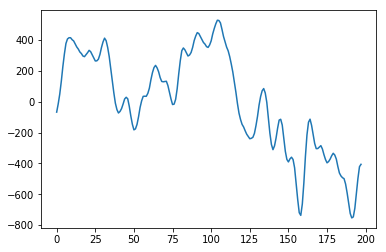

In [56]:
import matplotlib.pyplot as plt
plt.plot(x_with_mean[329])